In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, precision_recall_fscore_support

### Introduzindo os dados

In [2]:
#step_1 = pd.read_csv('extracted_features_files/challenge_raw_everyone.csv')
#step_2 = pd.read_csv('extracted_features_files/challenge_processed_everyone.csv')
#step_3 = pd.read_csv('extracted_features_files/challenge_cleaned_everyone.csv')
step_4 = pd.read_csv('extracted_features_files/challenge_cleaned_everyone.csv')

In [3]:
step_1.head(5)

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,mean_qrs_interval,mean_qs_distance,mean_qt_distance,mean_qrs_offset,mean_qrs_onset,person
0,-0.713329,0.792270,-0.173784,0.792270,0.792270,0.006206,0.040516,0.012240,930.0,1.505599,42.5,28.500000,5.000000,-0.149761,-0.059106,tr14-0291
1,-0.665888,0.758830,-0.193415,0.758830,0.758830,0.010788,0.011119,0.002074,860.0,1.424718,47.5,33.500000,5.000000,-0.155581,-0.038329,tr14-0291
2,-0.724221,0.822585,-0.199239,0.849976,0.822585,0.021476,0.038941,0.001512,850.0,1.546806,76.0,52.333333,24.666667,-0.174172,-0.016297,tr14-0291
3,-0.727936,0.840291,-0.191848,0.840291,0.840291,0.006431,0.037556,0.006425,925.0,1.568227,44.5,30.500000,5.000000,-0.171177,-0.033540,tr14-0291
4,-0.742179,0.808661,-0.189985,0.808661,0.808661,0.007297,0.002672,0.005386,870.0,1.550841,44.5,30.500000,4.000000,-0.160617,-0.056178,tr14-0291


## Passo 1: Treino sem modificações aos dados originais

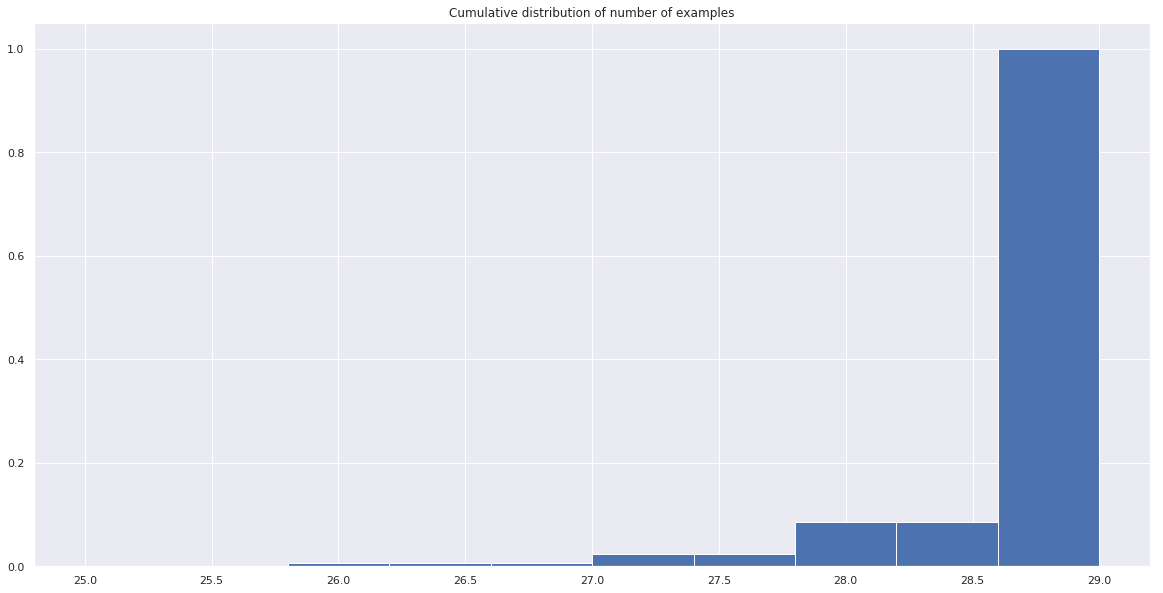

In [4]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_1['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [5]:
## Remove pessoas que tem menos que 28 segmentos
min_n_of_segments = 29
mask = step_1['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)

for person in people_to_remove:
    step_1 = step_1[step_1.person != person]

In [6]:
#le_step_1 = LabelEncoder()
#step_1['person'] = pd.Series(le_step_1.fit_transform(step_1['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_1 = step_1[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_1 = X_step_1.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_1 = step_1['person']
X_train_step_1, X_test_step_1, y_train_step_1, y_test_step_1 = train_test_split(X_step_1, y_step_1,
                                                                                test_size = 0.2)

In [7]:
n_steps = 2
list_of_training_x = np.array_split(X_train_step_1, n_steps)
list_of_training_y = np.array_split(y_train_step_1, n_steps)
n_estimators = 100

rf_step_1 = ExtraTreesClassifier(warm_start=True, n_estimators=n_estimators,
                                   max_depth=100, min_samples_leaf=3, min_samples_split=10, verbose=3)
for i in range(n_steps):
    rf_step_1.fit(list_of_training_x[i],
                  list_of_training_y[i])
    n_estimators += 100
    rf_step_1.set_params(n_estimators=n_estimators)
    
predictions_step_1 = rf_step_1.predict(X_test_step_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished


In [8]:
cr = classification_report(y_test_step_1, predictions_step_1, output_dict=True)
df = pd.DataFrame(cr).transpose()
df.to_csv('result_1.csv')

/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Passo 2: Treino com adição de segmentos gerados aleatoriamente

In [3]:
step_2.head()

,mean_q,mean_r,mean_s,mean_p,mean_t,stdev_q,stdev_r,stdev_s,mean_rr_interval,mean_rq_amplitude,mean_qrs_interval,mean_qs_distance,mean_qt_distance,mean_qrs_offset,mean_qrs_onset,person
0,-0.713329,0.792270,-0.173784,0.792270,0.792270,0.006206,0.040516,0.012240,930.0,1.505599,42.5,28.500000,5.000000,-0.149761,-0.059106,tr14-0291
1,-0.665888,0.758830,-0.193415,0.758830,0.758830,0.010788,0.011119,0.002074,860.0,1.424718,47.5,33.500000,5.000000,-0.155581,-0.038329,tr14-0291
2,-0.724221,0.822585,-0.199239,0.849976,0.822585,0.021476,0.038941,0.001512,850.0,1.546806,76.0,52.333333,24.666667,-0.174172,-0.016297,tr14-0291
3,-0.727936,0.840291,-0.191848,0.840291,0.840291,0.006431,0.037556,0.006425,925.0,1.568227,44.5,30.500000,5.000000,-0.171177,-0.033540,tr14-0291
4,-0.742179,0.808661,-0.189985,0.808661,0.808661,0.007297,0.002672,0.005386,870.0,1.550841,44.5,30.500000,4.000000,-0.160617,-0.056178,tr14-0291


In [4]:
#le_step_2 = LabelEncoder()
#step_2['person'] = pd.Series(le_step_2.fit_transform(step_2['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_2 = step_2[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_2 = X_step_2.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_2 = step_2['person']

X_train_step_2, X_test_step_2, y_train_step_2, y_test_step_2 = train_test_split(X_step_2, y_step_2,
                                                                                test_size = 0.2)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_2['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [6]:
list_of_training_x = np.array_split(X_train_step_2, 2)
list_of_training_y = np.array_split(y_train_step_2, 2)
n_estimators = 100

rf_step_2 = ExtraTreesClassifier(warm_start=True, n_estimators=n_estimators, max_depth=80, min_samples_leaf=3, min_samples_split=10, verbose=3)
for i in range(2):
    rf_step_2.fit(list_of_training_x[i], list_of_training_y[i])
    rf_step_2.set_params(n_estimators=n_estimators)
    n_estimators+=100

predictions_step_2 = rf_step_2.predict(X_test_step_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


In [7]:
cr_step_2 = classification_report(y_test_step_2, predictions_step_2, output_dict=True)
cr_df_step_2 = pd.DataFrame(cr_step_2).transpose()
cr_df_step_2.to_csv('result_2.csv')

## Passo 3: Treino com adição de segmentos gerados aleatoriamente e remoção de 

---

outliers

In [ ]:
step_3.head()

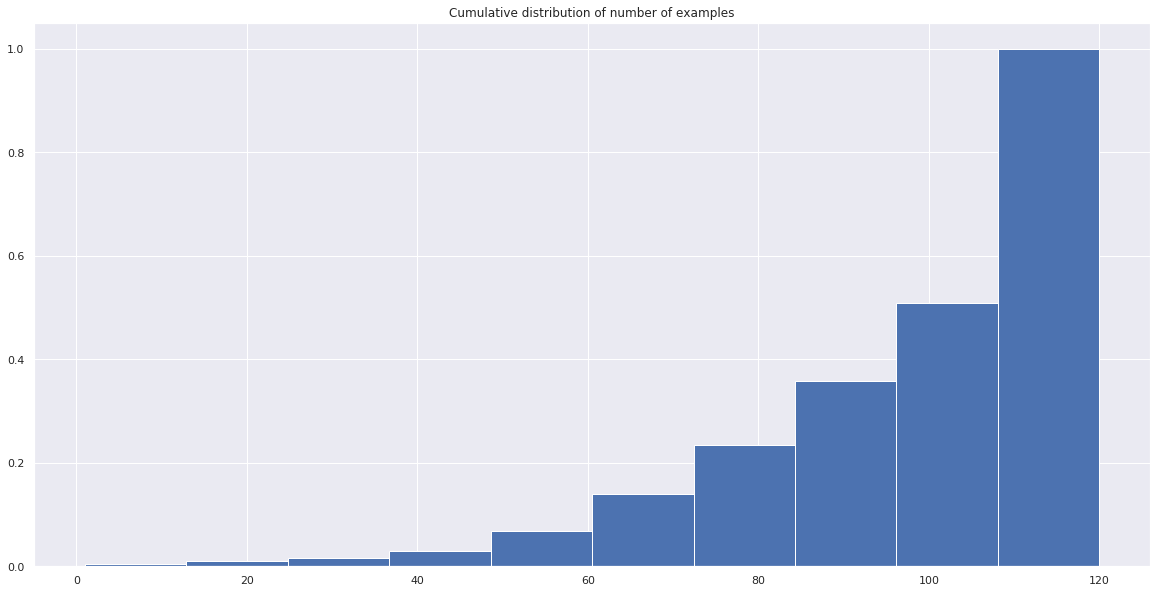

In [3]:
plt.figure(figsize=(20,10))
plt.title("Cumulative distribution of number of examples")
step_3['person'].value_counts(ascending=True).hist(cumulative=True, density=1)

In [4]:
## Remove pessoas que tem menos que 60 segmentos
min_n_of_segments = 60
mask = step_3['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)
for person in people_to_remove:
    step_3 = step_3[step_3.person != person]

In [5]:
#le_step_3 = LabelEncoder()
#step_3['person'] = pd.Series(le_step_3.fit_transform(step_3['person']))
original_columns = ['mean_q', 'mean_r', 'mean_s', 'stdev_q', 'stdev_r','stdev_s',
                   'mean_rr_interval', 'mean_rq_amplitude', 'mean_qrs_interval']

X_step_3 = step_3[original_columns]
# Preenche os dados faltosos com a média da respectiva coluna
X_step_3 = X_step_3.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_3 = step_3['person']

X_train_step_3, X_test_step_3, y_train_step_3, y_test_step_3 = train_test_split(X_step_3, y_step_3,
                                                                                test_size = 0.2, stratify=y_step_3)
print(f'Há {y_train_step_3.nunique()} classes únicas no conjunto de TREINO')
print(f'Há {y_test_step_3.nunique()} classes únicas no conjunto de TESTE')

Há 1851 classes únicas no conjunto de TREINO
Há 1851 classes únicas no conjunto de TESTE


In [6]:
batch_size = 2
list_of_training_x_step_3 = np.array_split(X_train_step_3, batch_size)
list_of_training_y_step_3 = np.array_split(y_train_step_3, batch_size)
n_estimators = 100

# Verifica sem algum split ficou com uma amostra a menos
for count, y in enumerate(list_of_training_y_step_3):
    print(f'Elementos unicos no split {count}:', y.nunique())

rf_step_3 = ExtraTreesClassifier(warm_start=True, n_estimators=n_estimators, max_depth=80, min_samples_leaf=3, min_samples_split=10, verbose=3)

for i in range(batch_size):
    rf_step_3.fit(list_of_training_x_step_3[i], list_of_training_y_step_3[i])
    n_estimators += 100
    rf_step_3.set_params(n_estimators=n_estimators)

Elementos unicos no split 0: 1851
Elementos unicos no split 1: 1851


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [7]:
predictions_step_3 = rf_step_3.predict(X_test_step_3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.4min finished


In [8]:
cr_step_3 = classification_report(y_test_step_3, predictions_step_3, output_dict=True)
cr_df_step_3 = pd.DataFrame(cr_step_3).transpose()
cr_df_step_3.to_csv('result_3.csv')

/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Passo 4: Treino com novas features, segmentos gerados aleatoriamente e remoção de ouliers

In [ ]:
step_4.head()

In [3]:
## Remove pessoas que tem menos que 60 segmentos
min_n_of_segments = 60
mask = step_4['person'].value_counts() < min_n_of_segments
people_to_remove = list(mask[mask].index)
for person in people_to_remove:
    step_4 = step_4[step_4.person != person]

In [4]:
#le_step_4 = LabelEncoder()
#step_4['person'] = pd.Series(le_step_4.fit_transform(step_4['person']))

X_step_4 = step_4.drop('person', axis=1)
# Preenche os dados faltosos com a média da respectiva coluna
X_step_4 = X_step_4.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y_step_4 = step_4['person']

X_train_step_4, X_test_step_4, y_train_step_4, y_test_step_4 = train_test_split(X_step_4, y_step_4,
                                                                                test_size = 0.2, stratify=y_step_4)
print(f'Há {y_train_step_4.nunique()} classes únicas no conjunto de TREINO')
print(f'Há {y_test_step_4.nunique()} classes únicas no conjunto de TESTE')

Há 1851 classes únicas no conjunto de TREINO
Há 1851 classes únicas no conjunto de TESTE


In [5]:
batch_size = 2
list_of_training_x_step_4 = np.array_split(X_train_step_4, batch_size)
list_of_training_y_step_4 = np.array_split(y_train_step_4, batch_size)
n_estimators = 100

# Verifica sem algum split ficou com uma amostra a menos
for count, y in enumerate(list_of_training_y_step_4):
    print(f'Elementos unicos no split {count}:', y.nunique())

rf_step_4 = ExtraTreesClassifier(warm_start=True, n_estimators=n_estimators, max_depth=100, min_samples_leaf=3, min_samples_split=10, verbose=3)

for i in range(batch_size):
    rf_step_4.fit(list_of_training_x_step_4[i], list_of_training_y_step_4[i])
    n_estimators += 100
    rf_step_4.set_params(n_estimators=n_estimators)

Elementos unicos no split 0: 1851
Elementos unicos no split 1: 1851


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [6]:
predictions_step_4 = rf_step_4.predict(X_test_step_4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished


In [7]:
cr_step_4 = classification_report(y_test_step_4, predictions_step_4, output_dict=True)
cr_df_step_4 = pd.DataFrame(cr_step_4).transpose()
cr_df_step_4.to_csv('result_4.csv')

## Visualizing the results

In [2]:
def filter_results(results):
    """ Remove the last three rows of a result csv
        where there are the accuracy, macro avg and
        weighted avg values
    """
    results.rename(columns={"Unnamed: 0": "person"}, inplace=True)

    accuracy = results[results['person'] == 'accuracy']
    macro_avg = results[results['person'] == 'macro avg']
    weighted_avg = results[results['person'] == 'weighted avg']

    results.drop(results.tail(3).index,inplace=True)

    return results, accuracy, macro_avg, weighted_avg

In [3]:
sns.set_context("paper")

In [4]:
results_step_1, accuracy_step_1, macro_avg_step_1, weighted_avg_step_1 = filter_results(pd.read_csv('result_1.csv'))
results_step_2, accuracy_step_2, macro_avg_step_2, weighted_avg_step_2 = filter_results(pd.read_csv('result_2.csv'))
results_step_3, accuracy_step_3, macro_avg_step_3, weighted_avg_step_3 = filter_results(pd.read_csv('result_3.csv'))
results_step_4, accuracy_step_4, macro_avg_step_4, weighted_avg_step_4 = filter_results(pd.read_csv('result_4.csv'))

In [5]:
results_step_4.tail(5)

,person,f1-score,precision,recall,support
1846,tr14-0268,0.816327,0.769231,0.869565,23.0
1847,tr14-0272,0.893617,0.913043,0.875000,24.0
1848,tr14-0276,0.846154,1.000000,0.733333,15.0
1849,tr14-0278,0.714286,0.789474,0.652174,23.0
1850,tr14-0291,0.816327,0.800000,0.833333,24.0


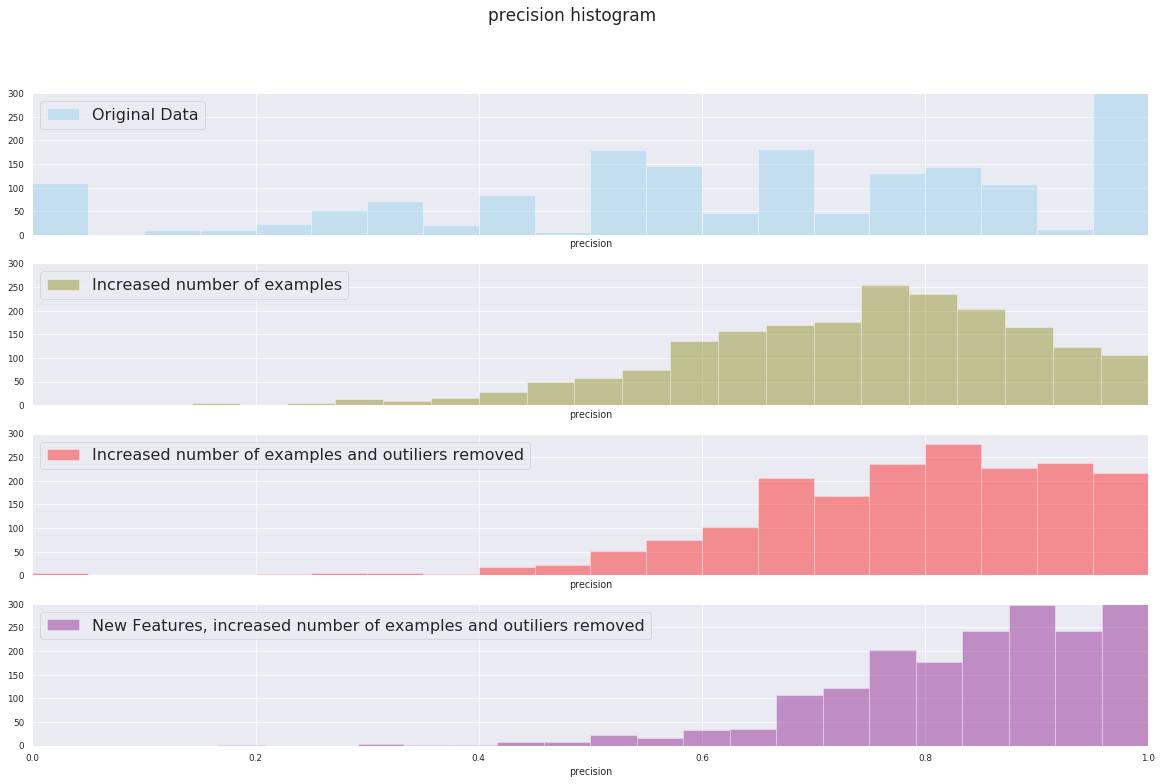

In [6]:
f, axes = plt.subplots(4, 1, figsize=(20, 12), sharex='col')
plt.xlim(0, 1)
metric= 'precision'
bins = 20
kde=False
for ax in axes: ax.set_ylim(0,300) 
f.suptitle(f'{metric} histogram', fontsize=17)
sns.distplot(results_step_1[metric], bins=bins, kde=kde, ax=axes[0], color="skyblue", label="Original Data")
axes[0].legend(loc="upper left", prop={'size': 16})
sns.distplot(results_step_2[metric], bins=bins, kde=kde, ax=axes[1], color="olive", label="Increased number of examples")
axes[1].legend(loc="upper left", prop={'size': 16})
sns.distplot(results_step_3[metric], bins=bins, kde=kde, ax=axes[2], color="red", label="Increased number of examples and outiliers removed")
axes[2].legend(loc="upper left", prop={'size': 16})
sns.distplot(results_step_4[metric], bins=bins, kde=kde, ax=axes[3], color="purple", label="New Features, increased number of examples and outiliers removed")
axes[3].legend(loc="upper left", prop={'size': 16})

/home/renato/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


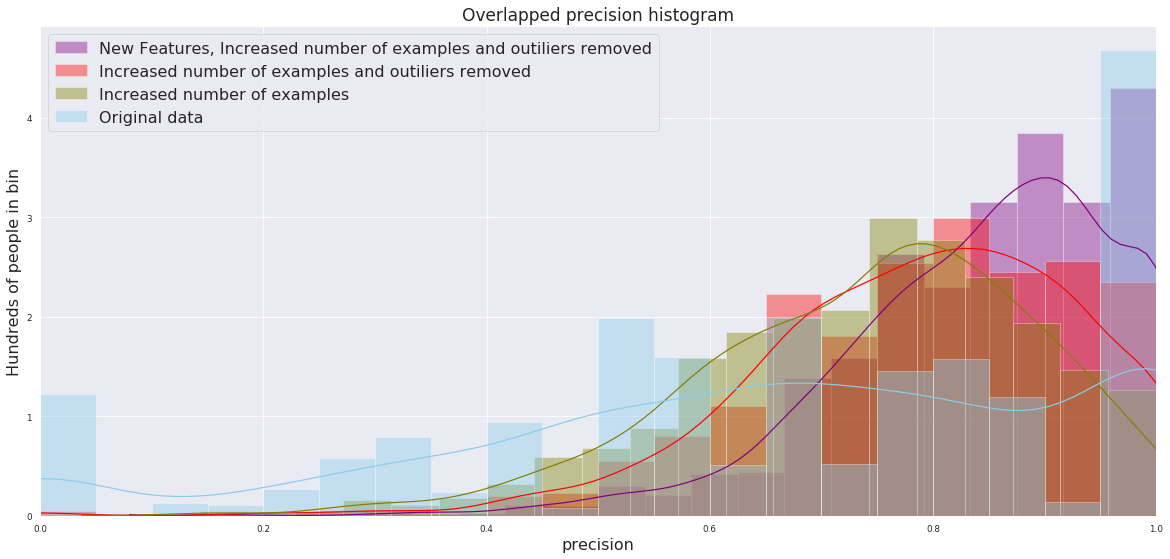

In [7]:
#TODO deix as cores do fundo opacas
plt.figure(figsize=(20,9))
bins = 20
metric = 'precision'
kde=True
sns.distplot(results_step_4[metric], bins=bins, kde=kde, color="purple", label="New Features, Increased number of examples and outiliers removed")
sns.distplot(results_step_3[metric], bins=bins, kde=kde, color="red", label="Increased number of examples and outiliers removed")
sns.distplot(results_step_2[metric], bins=bins, kde=kde, color="olive", label="Increased number of examples")
sns.distplot(results_step_1[metric], bins=bins, kde=kde, color="skyblue", label="Original data")
plt.ylabel('Hundreds of people in bin', fontsize=16)
plt.xlabel(metric, fontsize=16)
plt.title(f'Overlapped {metric} histogram', fontsize=17)
plt.xlim(0, 1)
plt.legend(loc="upper left", prop={'size': 16})

In [8]:
# unifica os resultados dos 4 testes em um dataframe unico
list_of_results = [results_step_1.mean(), results_step_2.mean(), results_step_3.mean(), results_step_4.mean()]
df = pd.DataFrame(list_of_results)
df.drop(['support'],  axis=1, inplace=True)
df

,f1-score,precision,recall
0,0.622810,0.660609,0.665191
1,0.724509,0.740167,0.738587
2,0.764051,0.786904,0.771769
3,0.824920,0.844981,0.828355


## Barplot empilhado

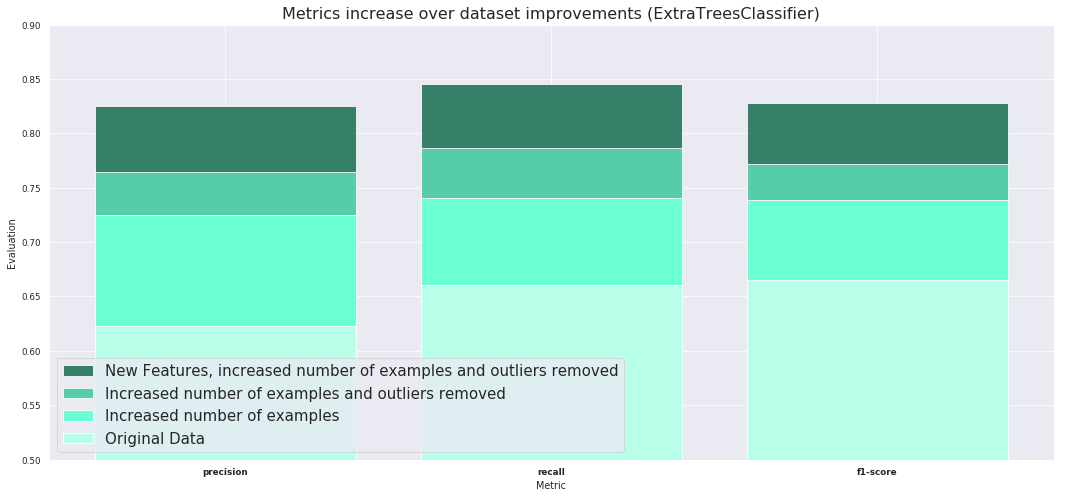

In [10]:
,# y-axis in bold
plt.figure(figsize=(18,8))
# 
bars1 = np.add(df.loc[0], df.loc[1]).tolist()
bars2 = np.add(np.add(df.loc[0], df.loc[1]), df.loc[2]).tolist()
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['precision','recall','f1-score']
barWidth = 0.80
plt.ylim(0.50,0.90)

# Create brown bars
plt.bar(r, df.loc[3], color='#368069', width=barWidth, label="New Features, increased number of examples and outliers removed")
# Create green bars (middle), on top of the firs ones
plt.bar(r, df.loc[2], color='#56CCA9', width=barWidth, label="Increased number of examples and outliers removed")
# Create green bars (top)
plt.bar(r, df.loc[1], color='#6BFFD3', width=barWidth, label="Increased number of examples")
# step 4
plt.bar(r, df.loc[0], color='#B8FFEA', width=barWidth, label="Original Data")
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.title('Metrics increase over dataset improvements (ExtraTreesClassifier)', fontsize=16)
plt.ylabel("Evaluation")
plt.xlabel("Metric")
plt.legend(loc="lower left", prop={'size':15})